In [120]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg 

%matplotlib inline

In [121]:
df = pd.read_csv("TrackManDB.csv")

# df1 = df[['Pitcher', 'PlateLocSide', 'PlateLocHeight', 'ExitSpeed']]  PITCHERS----------
df1 = df[['Batter', 'PlateLocSide', 'PlateLocHeight', 'ExitSpeed']]  #HITTERS----------

df1 = df1.replace(0, np.nan)
df1 = df1.dropna(subset=['ExitSpeed'])
# df.head()
# df1 = df1.replace(np.nan, 0)
# df1.head(100)


In [122]:
print(df["Batter"].unique())

['Marinconz, Nick' 'Corio, Taison' 'Ashworth, Kyle' 'Cabrera, Cole'
 'Greene, Elijah' 'Beesley, Bradlee' 'Samuelson, Tate'
 'Wagenseller, Blake' 'Ogrin, Scott' 'DiCarlo, Nick' 'Armstronng, Mark'
 'Emmerson, Myles' 'Gurnik, Connor' 'Kuzma, Jack' 'Taylor, Noah'
 'Loucks, Connor' 'Wells, Brett' 'Lee, Brooks']


In [123]:
# choosing which player you want
player = "Wagenseller, Blake"
df1 = df1.loc[df1["Batter"] == player]
df1.head()

,Batter,PlateLocSide,PlateLocHeight,ExitSpeed
27,"Wagenseller, Blake",-1.200422,2.240161,50.669301
30,"Wagenseller, Blake",-0.112234,2.609613,64.823198
72,"Wagenseller, Blake",-1.473941,1.455592,65.603863
73,"Wagenseller, Blake",-0.503455,1.868716,69.042791
128,"Wagenseller, Blake",0.918156,2.836669,54.785725


In [124]:
#  binning data horizontally 

# df2 = df1.pivot('PlateLocHeight' , 'PlateLocSide','ExitSpeed' )
bin_labels = ["outer third", "middle third", "inner third"]
bins = [-.83, -.28, .28, .83]
# df1.drop(columns = "Plate_Section", inplace = True)
df1["Plate_Section_H"] = pd.cut(df1["PlateLocSide"], bins = bins, labels=bin_labels, right = False)
df1 = df1.dropna(subset=['Plate_Section_H'])
df1 = df1.sort_values(by=["Plate_Section_H"])

df1.head(30)



,Batter,PlateLocSide,PlateLocHeight,ExitSpeed,Plate_Section_H
1555,"Wagenseller, Blake",-0.527967,2.437920,69.352459,outer third
73,"Wagenseller, Blake",-0.503455,1.868716,69.042791,outer third
370,"Wagenseller, Blake",-0.439538,2.013839,61.174576,outer third
374,"Wagenseller, Blake",-0.510355,2.080540,92.999749,outer third
1302,"Wagenseller, Blake",-0.596007,3.347201,94.267451,outer third
1227,"Wagenseller, Blake",-0.425333,2.246534,104.294829,outer third
690,"Wagenseller, Blake",-0.324495,2.980351,83.915878,outer third
1423,"Wagenseller, Blake",0.196817,1.597459,87.549676,middle third
1377,"Wagenseller, Blake",-0.215923,2.796295,99.859526,middle third
1116,"Wagenseller, Blake",-0.247694,2.551231,96.448856,middle third


In [125]:
#  binning data vertically

#  1.74, 2.30, 2.86, and 3.42
bin_labels = ["lower third", "middle third", "upper third"]
bins = [1.5, 2.23, 2.966, 3.7]
# df1.drop(columns = "Plate_Section", inplace = True)
df1["Plate_Section_V"] = pd.cut(df1["PlateLocHeight"], bins = bins, labels=bin_labels, right = False)
df1 = df1.dropna(subset=['Plate_Section_V'])
df1 = df1.sort_values(by=["Plate_Section_V"])
df1.head(100)

,Batter,PlateLocSide,PlateLocHeight,ExitSpeed,Plate_Section_H,Plate_Section_V
1066,"Wagenseller, Blake",0.060159,1.565912,82.905071,middle third,lower third
73,"Wagenseller, Blake",-0.503455,1.868716,69.042791,outer third,lower third
370,"Wagenseller, Blake",-0.439538,2.013839,61.174576,outer third,lower third
374,"Wagenseller, Blake",-0.510355,2.080540,92.999749,outer third,lower third
1423,"Wagenseller, Blake",0.196817,1.597459,87.549676,middle third,lower third
632,"Wagenseller, Blake",-0.277583,1.730020,104.649232,middle third,lower third
1425,"Wagenseller, Blake",0.199403,2.030592,99.577339,middle third,lower third
528,"Wagenseller, Blake",0.364033,2.547453,76.809288,inner third,middle third
1226,"Wagenseller, Blake",0.643749,2.886472,104.306799,inner third,middle third
918,"Wagenseller, Blake",0.023724,2.495252,104.113765,middle third,middle third


In [126]:
# lower third inner third average velo

array = np.arange(9).reshape(3,3)
lowerinner = df1.loc[(df1['Plate_Section_V'] == 'lower third') & (df1['Plate_Section_H'] == 'inner third')]
# array[2][0] = lowerinner["ExitSpeed"].mean()
array[2][0] = 70

print(lowerinner["ExitSpeed"].mean())
print(array)

nan
[[ 0  1  2]
 [ 3  4  5]
 [70  7  8]]


In [127]:
# lowerthird middlethird average velo

lowermiddle = df1.loc[(df1['Plate_Section_V'] == 'lower third') & (df1['Plate_Section_H'] == 'middle third')]
array[2][1] = lowermiddle["ExitSpeed"].mean()

In [128]:
# lowerthird outerthird average velo

lowerouter = df1.loc[(df1['Plate_Section_V'] == 'lower third') & (df1['Plate_Section_H'] == 'outer third')]
array[2][2] = lowerouter["ExitSpeed"].mean()
# print(array)

In [129]:
# middlethird innerthird average velo

middleinner = df1.loc[(df1['Plate_Section_V'] == 'middle third') & (df1['Plate_Section_H'] == 'inner third')]
array[1][0] = middleinner["ExitSpeed"].mean()

In [130]:
# middlethird middlethird average velo

middlemiddle = df1.loc[(df1['Plate_Section_V'] == 'middle third') & (df1['Plate_Section_H'] == 'middle third')]
array[1][1] = middlemiddle["ExitSpeed"].mean()

In [131]:
# middlethird outerthird average velo

middleouter = df1.loc[(df1['Plate_Section_V'] == 'middle third') & (df1['Plate_Section_H'] == 'outer third')]
array[1][2] = middleouter["ExitSpeed"].mean()
# array[1][2] = 70

In [132]:
# upperthird innerthird average velo

upperinner = df1.loc[(df1['Plate_Section_V'] == 'upper third') & (df1['Plate_Section_H'] == 'inner third')]
# array[0][0] = upperinner["ExitSpeed"].mean()
array[0][0] = 70

In [133]:
# upperthird middlethird average velo

uppermiddle = df1.loc[(df1['Plate_Section_V'] == 'upper third') & (df1['Plate_Section_H'] == 'middle third')]

# array[0][1] = uppermiddle["ExitSpeed"].mean()
array[0][1] = 70



In [134]:
# upperthird outerthird average velo

upperouter = df1.loc[(df1['Plate_Section_V'] == 'upper third') & (df1['Plate_Section_H'] == 'outer third')]
array[0][2] = upperouter["ExitSpeed"].mean()
# array[0][2] = 70
print(array)

[[70 70 89]
 [87 87 86]
 [70 93 74]]


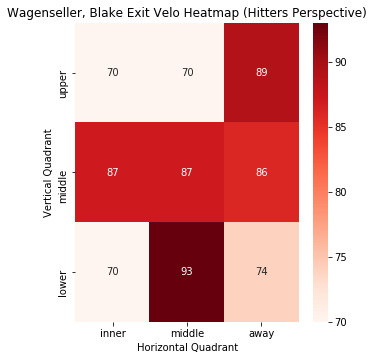

In [135]:


# df2 = df1.pivot('Plate_Section_H' , 'Plate_Section_V','ExitSpeed')

plt.figure(figsize = (5,5.5))
sns.set_palette(["#9b59b6","#3498db","#95a5a6","#e74c3c","#34495e","#2ecc71"])
sns.heatmap(array, cmap="Reds", cbar_kws={'ticks': [70,75,80,85,90,95,100]},xticklabels=["inner", "middle","away"], yticklabels=["upper","middle","lower"],annot=True)
plt.title(player + " Exit Velo Heatmap (Hitters Perspective)")
plt.xlabel("Horizontal Quadrant")
plt.ylabel("Vertical Quadrant")

plt.show()

In [39]:
df1.describe()

,PlateLocSide,PlateLocHeight,ExitSpeed
count,109.000000,109.000000,109.000000
mean,-0.117702,2.308890,77.557110
std,0.602514,0.509825,14.293970
min,-1.540430,0.805564,33.669541
25%,-0.501003,2.008046,65.830960
50%,-0.196031,2.310020,77.085800
75%,0.322774,2.672463,90.720994
max,1.173641,4.070456,102.705289


In [29]:
df1.sort_values('ExitSpeed', ascending = False)

,Pitcher,PlateLocSide,PlateLocHeight,ExitSpeed
314,"Scott, Kyle",1.092007,2.258020,102.705289
134,"Jameson, Ryan",-0.127488,1.549793,101.053429
187,"True, Derek",-0.173294,1.929220,100.474029
465,"Franks, Jason",0.224059,1.650018,100.163119
91,"Nelson, Darren",0.387933,2.361985,99.677220
379,"Colen, Craig",-0.229526,2.304242,98.978647
241,"True, Derek",0.453573,1.891940,98.515936
441,"Colen, Craig",0.313945,2.333868,98.087989
272,"Scott, Kyle",-0.776530,1.704033,97.786202
323,"Arens, Matt",-0.537637,2.780671,96.665973
